- 16 aziende (sorgenti), 19 files totali (4 relativi alla stessa azienda ariregister)
- 21 MB di spazio, ~1MB a sorgente


In [2]:
import pandas as pd
import os 
import json
import seaborn as sns
import matplotlib.pyplot as plt

SRC = 'sources/'

Matplotlib is building the font cache; this may take a moment.


In [3]:
schemas = []
for filename in os.listdir(SRC):
    file_path = os.path.join(SRC, filename)
    if file_path.endswith('.csv'):
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            df = pd.read_csv(file_path, encoding='ISO-8859-1')
    elif file_path.endswith('.json'):
        with open(file_path, 'r') as f:
            data = json.load(f)
        if isinstance(data, list):
            df = pd.json_normalize(data)
        else:
            df = pd.json_normalize([data])
    schema = {col: str(dtype) for col, dtype in zip(df.columns, df.dtypes)}
    schemas.append({"file": filename, "schema": schema})

In [4]:
all_columns = set()
for schema in schemas:
    all_columns.update(schema["schema"].keys())

comparison = []
for col in all_columns:
    col_info = {"Column": col}
    for schema in schemas:
        col_info[schema["file"]] = schema["schema"].get(col, pd.NA)
    comparison.append(col_info)

schema_comparison = pd.DataFrame(comparison)
display(schema_comparison)

,Column,AmbitionBox.csv,campaignindia.csv,companiesMarketCap_dataset.jsonl,company_social_urls.csv,DDD-cbinsight.com.csv,DDD-teamblind.com.csv,disfold.com.json,ft.com.json,hitHorizons_dataset.jsonl,MalPatSaj-forbes.com.xls,MalPatSaj-wikipedia.org.xls,output_globaldata.json,output_govuk_bigsize.json,valueToday_dataset.jsonl,wissel-activity-ariregister.rik.ee.csv,wissel-aziende-ariregister.rik.ee.csv,wissel-aziende-info-clipper.com.csv,wissel-partners-ariregister.rik.ee.csv,wissel-rappresentanti-ariregister.rik.ee.csv
0,Start Date,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,object
1,website,<NA>,<NA>,<NA>,<NA>,<NA>,object,<NA>,<NA>,<NA>,<NA>,<NA>,object,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,Trade Name,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,object,<NA>,<NA>
3,company_number,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,object,object,<NA>,<NA>,<NA>,<NA>,<NA>
4,name,<NA>,<NA>,<NA>,<NA>,object,object,object,object,object,object,object,object,object,object,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,INDEX,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,int64,<NA>,<NA>
66,Facebook,<NA>,<NA>,<NA>,object,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
67,Country,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,object,<NA>,<NA>
68,CATEGORY,<NA>,object,object,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [5]:
# Save the comparison to a CSV file
output = "schema_comparison.csv"
schema_comparison['Column'] = schema_comparison['Column'].str.lower()  
schema_comparison = schema_comparison.sort_values(by="Column", ascending=True)
schema_comparison.columns = schema_comparison.columns.str.strip()
schema_comparison['Column'] = schema_comparison['Column'].str.strip()
schema_comparison.to_csv(output, index=False)

### Some stats

In [6]:
# Extract some stats

# Sort and display the most common attributes
attribute_coverage = schema_comparison.set_index('Column').notna().sum(axis=1)
attribute_coverage = attribute_coverage.sort_values(ascending=False)
print(attribute_coverage)


Column
name         10
industry      7
founded       6
name          5
link          5
             ..
city          1
nace code     1
city          1
ceo           1
investors     1
Length: 70, dtype: int64


In [7]:
# Count available attributes per data source
source_completeness = schema_comparison.set_index('Column').notna().sum(axis=0)
print("Attributes per source:\n", source_completeness.sort_values(ascending=False))

Attributes per source:
 wissel-aziende-info-clipper.com.csv             11
DDD-cbinsight.com.csv                           11
wissel-aziende-ariregister.rik.ee.csv           10
output_globaldata.json                           9
MalPatSaj-forbes.com.xls                         7
DDD-teamblind.com.csv                            7
ft.com.json                                      7
hitHorizons_dataset.jsonl                        7
MalPatSaj-wikipedia.org.xls                      7
output_govuk_bigsize.json                        7
valueToday_dataset.jsonl                         7
disfold.com.json                                 6
wissel-activity-ariregister.rik.ee.csv           5
wissel-partners-ariregister.rik.ee.csv           5
AmbitionBox.csv                                  5
campaignindia.csv                                5
company_social_urls.csv                          5
companiesMarketCap_dataset.jsonl                 5
wissel-rappresentanti-ariregister.rik.ee.csv     5
dtype: 

In [10]:
# Check attributes present in all sources
common_attributes = schema_comparison.set_index('Column').notna().all(axis=1)

# Properly filter rows using the correct index
common_attributes_list = schema_comparison.loc[common_attributes[common_attributes].index, 'Column'].tolist()
print("Attributes in all sources:\n", common_attributes_list)

Attributes in all sources:
 []


In [9]:
# Count occurrences of each type
type_counts = schema_comparison.set_index('Column').apply(pd.Series.value_counts).fillna(0)
print("Data type counts across sources:\n", type_counts)

Data type counts across sources:
          AmbitionBox.csv  campaignindia.csv  companiesMarketCap_dataset.jsonl  \
float64              0.0                0.0                               0.0   
int64                0.0                1.0                               1.0   
object               5.0                4.0                               4.0   

         company_social_urls.csv  DDD-cbinsight.com.csv  \
float64                      0.0                      1   
int64                        0.0                      1   
object                       5.0                      9   

         DDD-teamblind.com.csv  disfold.com.json  ft.com.json  \
float64                      1               0.0          0.0   
int64                        1               0.0          0.0   
object                       5               6.0          7.0   

         hitHorizons_dataset.jsonl  MalPatSaj-forbes.com.xls  \
float64                        0.0                       0.0   
int64          

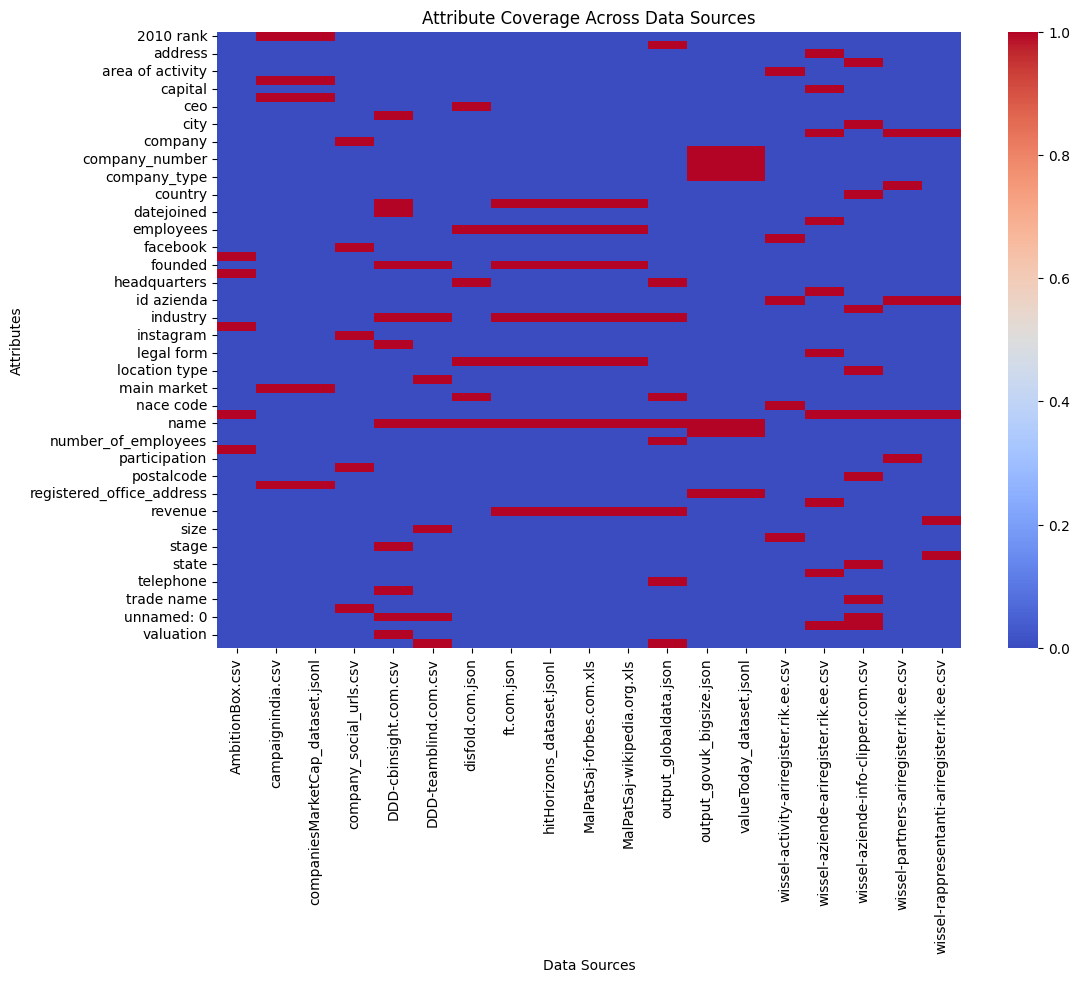

In [11]:
# Convert to binary presence/absence for heatmap visualization
binary_df = schema_comparison.set_index('Column').notna().astype(int)

plt.figure(figsize=(12, 8))
sns.heatmap(binary_df, cmap='coolwarm', cbar=True)
plt.title('Attribute Coverage Across Data Sources')
plt.xlabel('Data Sources')
plt.ylabel('Attributes')
plt.show()

### Schema align

In [11]:
import pandas as pd
import json
import os
import numpy as np  # Importa numpy per utilizzare np.nan

def load_data(file_path):
    """
    Carica un file CSV, XLS, JSON o JSONL e restituisce un DataFrame con le colonne "name", "category" e "address".
    """
    encodings = ['utf-8', 'ISO-8859-1', 'latin1']
    
    for encoding in encodings:
        try:
            if file_path.endswith('.csv'):
                df = pd.read_csv(file_path, encoding=encoding)
            elif file_path.endswith(('.xls', '.xlsx')):
                df = pd.read_excel(file_path)
            elif file_path.endswith('.json'):
                with open(file_path, 'r', encoding=encoding) as f:
                    data = json.load(f)
                df = pd.DataFrame(data)
            elif file_path.endswith('.jsonl'):
                df = pd.read_json(file_path, lines=True)
            else:
                raise ValueError("Formato non supportato")
            
            # Definiamo i possibili nomi per "name", "category" e "address"
            name_columns = ["Name", "name", "Company", "BRAND NAME"]
            category_columns = ["category", "null", "Area of Activity", "company_business", "industry", "CATEGORY", "Industry"]
            address_columns = ["address", "Address Name", "Address"]
            
            # Inizializziamo name, category e address come NaN
            name_value = np.nan
            category_value = np.nan
            address_value = np.nan
            
            # Troviamo il primo campo esistente per "name"
            for col in name_columns:
                if col in df.columns:
                    name_value = df[col].astype(str).str.strip().str.lower()  # Normalizzazione dei valori
                    break
            
            # Troviamo il primo campo esistente per "category"
            for col in category_columns:
                if col in df.columns:
                    category_value = df[col]
                    break
            
            # Troviamo il primo campo esistente per "address"
            for col in address_columns:
                if col in df.columns:
                    address_value = df[col]
                    # Se la colonna è "address" tutto in minuscolo, prendiamo solo la prima parola fino alla virgola
                    if col == "address":
                        address_value = address_value.str.split(',').str[0]  # Prendi solo la parte prima della virgola
                    break
            
            # Crea un DataFrame con le colonne "name", "category" e "address"
            result_df = pd.DataFrame({"name": name_value, "category": category_value, "address": address_value}, index=range(len(df)))
            return result_df
        
        except Exception as e:
            print(f"Errore con il file {file_path} usando encoding {encoding}: {e}")
    
    # In caso di errore dopo aver provato tutti gli encoding
    print(f"Impossibile caricare il file {file_path} con i codici di encoding disponibili.")
    return pd.DataFrame(columns=["name", "category", "address"])

# Cartella contenente i file
source_folder = "sources/"

# Ottieni la lista dei file nella cartella source
file_list = [os.path.join(source_folder, file) for file in os.listdir(source_folder) 
             if file.endswith(('.csv', '.xls', '.xlsx', '.json', '.jsonl'))]

# Separare i file in due gruppi
wissel_files = [file for file in file_list if os.path.basename(file) in [
    "wissel-rappresentanti-ariregister.rik.ee.csv", "wissel-partners-ariregister.rik.ee.csv"]]
other_files = [file for file in file_list if file not in wissel_files]

# Creare due DataFrame separati
wissel_df = pd.concat([load_data(file) for file in wissel_files], ignore_index=True)
other_df = pd.concat([load_data(file) for file in other_files], ignore_index=True)

# Salvare i risultati in due CSV separati
wissel_df.to_csv("output_wissel.csv", index=False, encoding='utf-8')
other_df.to_csv("output_other.csv", index=False, encoding='utf-8')

print("Schema unificato salvato in 'output_wissel.csv' e 'output_other.csv'")


Errore con il file sources/AmbitionBox.csv usando encoding utf-8: 'utf-8' codec can't decode byte 0xe9 in position 3: invalid continuation byte
Errore con il file sources/MalPatSaj-forbes.com.xls usando encoding utf-8: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.
Errore con il file sources/MalPatSaj-forbes.com.xls usando encoding ISO-8859-1: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.
Errore con il file sources/MalPatSaj-forbes.com.xls usando encoding latin1: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.
Impossibile caricare il file sources/MalPatSaj-forbes.com.xls con i codici di encoding disponibili.
Errore con il file sources/MalPatSaj-wikipedia.org.xls usando encoding utf-8: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to insta